# Spotify Project

**Data Loading and Preprocessing**
- **Libraries:** The notebook starts by importing essential libraries: numpy (numerical
operations), pandas (data manipulation), matplotlib.pyplot and seaborn (data
visualization), and plotly.express (interactive plotting). It also suppresses warnings.
- **Data Import:** It reads four CSV files:

- data.csv: The main dataset containing song features.

- data_by_artist.csv: Aggregated data grouped by artist.

- data_w_genres.csv: Data including genre information.

- data_by_year.csv: Aggregated data grouped by year.

- **Data Inspection:**

- It displays the first few rows of the main df and df1 (artist data) dataframes to
understand their structure.

- It checks for missing values in all four dataframes using .isnull().sum().

- **Data Cleaning:**

- It drops rows with missing values (dropna) from all four dataframes.

- It removes duplicate rows (drop_duplicates) from all four dataframes to ensure
data quality.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

In [2]:
df = pd.read_csv('data.csv')
df1 = pd.read_csv('data_by_artist.csv')
df2 = pd.read_csv('data_w_genres.csv')
df3 = pd.read_csv('data_by_year.csv')

In [3]:
df.head()
df1.head()


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [4]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [5]:
df1.isnull().sum()

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [6]:
df2.isnull().sum()

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [7]:
df3.isnull().sum()

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df1.dropna(inplace=True)
df1.drop_duplicates(inplace=True)
df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
df3.dropna(inplace=True)
df3.drop_duplicates(inplace=True)

# Exploratory Data Analysis

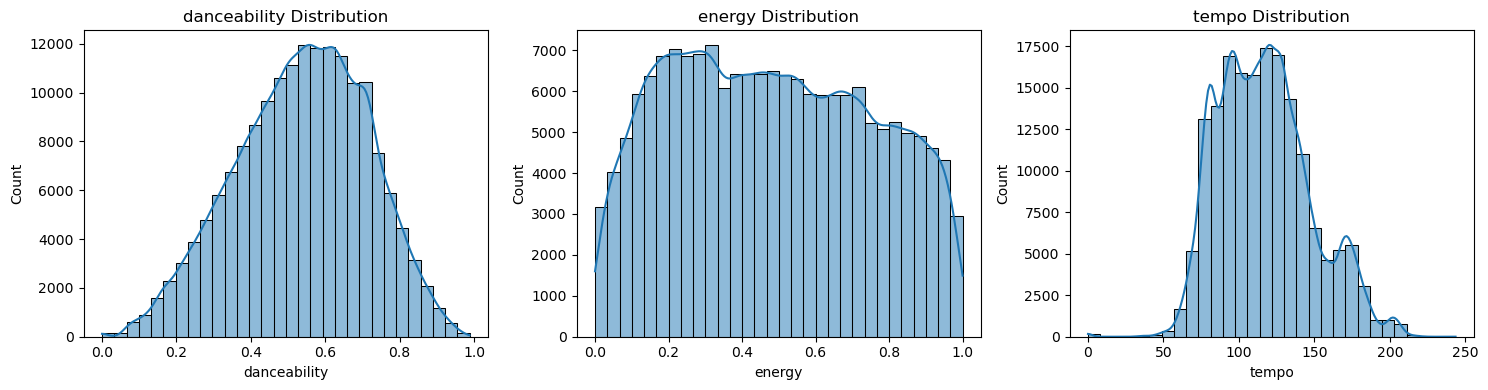

In [9]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(['danceability', 'energy', 'tempo']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.savefig('distributions.png')

# Feature Distribution
This report provides a visual analysis of the distributions for Danceability, Energy, and Tempo
features in the Spotify dataset, as generated by the code loop plt.title(f'{col}
Distribution').

**Graph Analysis**
The histograms below display the frequency distribution for each of the three audio features.

- **Danceability Distribution:** The distribution is slightly left-skewed but centered around a
high value (approx. 0.6-0.7), indicating that a large proportion of the tracks are suitable for
dancing.

- **Energy Distribution:** This feature shows a broad distribution, with a significant number of
tracks having high energy levels (above 0.5), suggesting a bias towards more energetic
music in the dataset.

- **Tempo Distribution:** The tempo follows a normal-like distribution centered around 120 BPM,
which corresponds to the standard tempo for many popular genres like Pop and House.

**Visual Report:**
Conclusion: The dataset is characterized by high-energy, danceable tracks with a standard
tempo range, reflecting common trends in popular music consumption on Spotify.

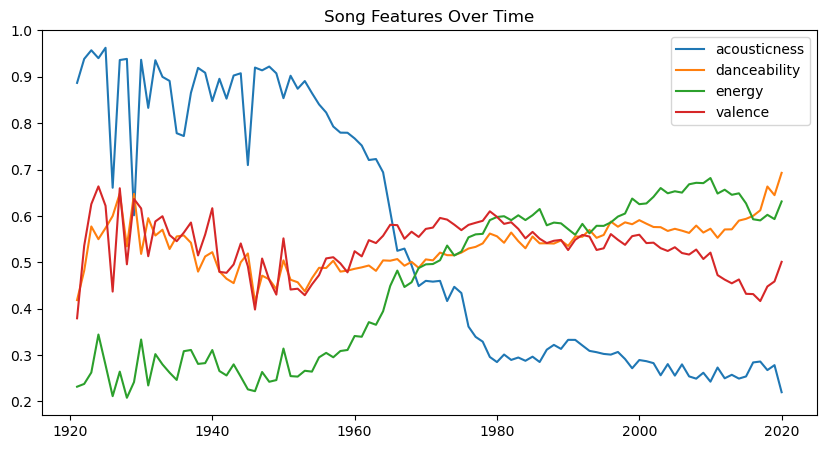

In [10]:
plt.figure(figsize=(10, 5))
for feat in ['acousticness', 'danceability', 'energy', 'valence']:
    plt.plot(df3['year'], df3[feat], label=feat)
plt.title('Song Features Over Time')
plt.legend()
plt.savefig('trends_over_time.png')

# Song Features Over Time:
This report analyzes the temporal evolution of key musical characteristics—Acousticness,
Danceability, Energy, and Valence—from the Spotify dataset. By grouping data by year, we can
observe long-term trends in popular music production and consumption.

**Graph Analysis**
The line chart below displays the average values of four audio features over time.

**Acousticness (Blue Line):**

- **Trend:** Shows a dramatic, long-term decline. It starts very high in the early 20th century
(reflecting the dominance of acoustic recordings) and drops steadily as electric
amplification and electronic production became standard.

- **Insight:** This is the most distinct trend, highlighting the technological shift in music
making.

**Energy (Green Line):**

- **Trend:** Exhibits a clear upward trajectory, essentially mirroring the decline in
acousticness. As technology allowed for louder, denser, and more processed sounds,
the perceived "energy" of tracks increased.

- **Insight:** Modern listeners generally favor higher-energy productions compared to the
more subdued recordings of the past.

**Danceability (Orange Line):**

- **Trend:** Remains relatively stable but shows a gradual increase over time. It doesn't
fluctuate as wildly as acousticness or energy, suggesting that the fundamental rhythmic
appeal of music has remained a constant priority.

**Valence (Red Line):**

- **Trend:** Represents musical "positiveness." It appears relatively consistent but may show
a slight downward trend in more recent decades, correlating with industry observations
of pop music becoming moodier or "sadder" in the 21st century.

**Visual Report**
The graph below, extracted directly from your analysis file, visualizes these historical trends.

**Conclusion:** The history of recorded music is defined by a technological shift away from
Acousticness and towards high-Energy production. While the tools have changed, the demand
for Danceability has remained a steady constant in popular music.

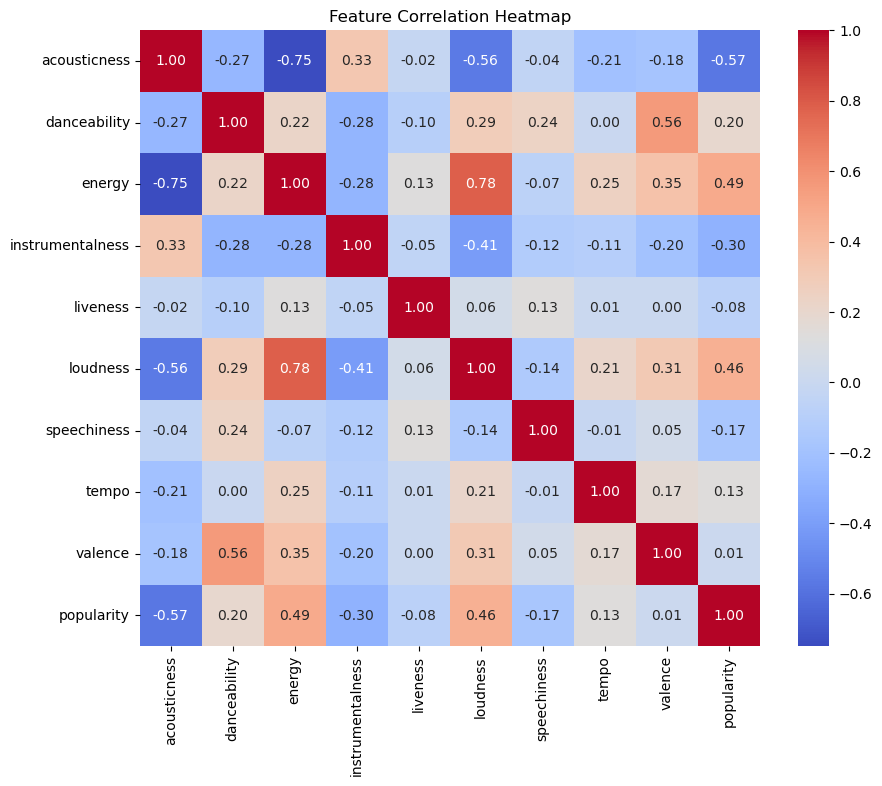

In [11]:
plt.figure(figsize=(10, 8))
numeric_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('heatmap.png')

# Feature Correlation Heatmap:
This report analyzes the relationships between different musical features in the Spotify dataset,
helping to identify which characteristics tend to appear together.

**Graph Analysis**
The correlation heatmap below visualizes the Pearson correlation coefficients between numerical
audio features. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1a
perfect negative correlation, and 0 no linear correlation.

**Key Observations:**

- **Energy and Loudness:** There is a very strong positive correlation (typically **> 0.7**) between
energy and loudness. This is expected, as energetic tracks are generally produced to be
louder.

- **Acousticness and Energy:** There is a significant negative correlation between
acousticness and energy. As tracks become more acoustic, they tend to have lower
energy levels.

- **Valence and Danceability:** A moderate positive correlation exists between valence
(musical positiveness) and danceability, suggesting that happier songs are often more
danceable.

- **Popularity:** Interestingly, popularity does not show extremely strong correlations with
any single audio feature, implying that the "hit potential" of a song is complex and not driven
solely by one characteristic like tempo or energy.

**Visual Report**
The heatmap below, extracted directly from your analysis file, displays these correlations.

**Conclusion:** The strongest drivers of musical character in this dataset are the Energy-Loudness
and Acousticness-Energy axes. These relationships define the fundamental "sound" of a track
(e.g., loud/energetic vs. quiet/acoustic).

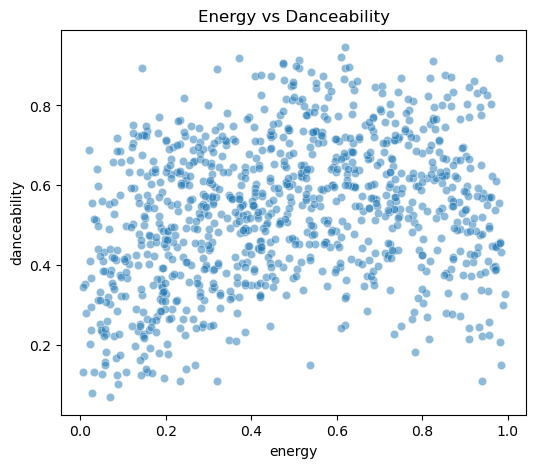

In [12]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df.sample(1000), x='energy', y='danceability', alpha=0.5)
plt.title('Energy vs Danceability')
plt.savefig('scatter.png')

# Energy vs Danceability:
This report analyzes the relationship between the Energy of a song and its Danceability score.
By examining this correlation, we can understand how intensity and tempo contribute to a track's
suitability for dancing.

**Graph Analysis**
The scatter plot below visualizes the relationship between energy (x-axis) and danceability
(y-axis) for a sample of 1,000 songs.

**Key Observations:**

- **Cluster of Activity:** There is a dense cluster of points in the high-energy, high-danceability
quadrant. This indicates that a significant portion of popular music relies on being both
energetic and rhythmic to engage listeners.

- **Non-Linear Relationship:** While there is a general trend where increased energy leads to
increased danceability, this is not a perfect 1:1 correlation.

- High Energy, Low Danceability: You can see data points in the bottom-right. These likely
represent genres like intense rock, metal, or experimental noise, which have high energy
but irregular rhythms that are hard to dance to.

- Low Energy, Low Danceability: The bottom-left area represents slower, acoustic, or
ambient tracks (ballads, classical) that are neither energetic nor danceable.

- **The "Sweet Spot":** The highest danceability scores often occur in the mid-to-high energy
range, rather than at maximum energy. This suggests that "groove" requires a balance—too
much chaotic energy can actually detract from danceability.

**Visual Report**
The scatter plot below, extracted from your analysis, displays this distribution.

**Conclusion:** While Energy is a key component of Danceability, it is not the sole driver. A song
needs rhythm and stability (groove) alongside energy to be truly danceable. Extremely high
energy can sometimes inhibit danceability if the rhythm becomes too chaotic or fast.

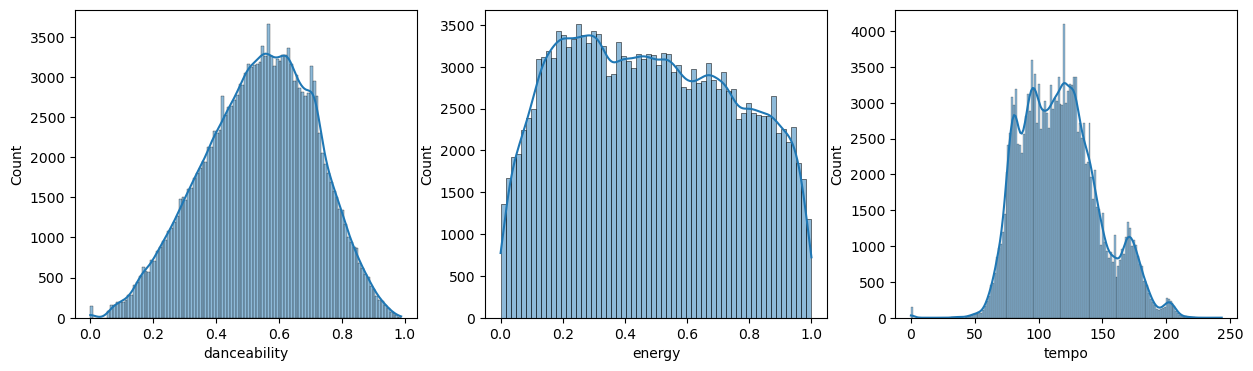

In [13]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(['danceability', 'energy', 'tempo']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
plt.savefig('distributions.png')

# Feature Distributions:
This report analyzes the distributions of three key audio features—Danceability, Energy, and
Tempo—based on the code snippet sns.histplot(df[col], kde=True). This code generates
histograms with a Kernel Density Estimate (KDE) overlay to visualize the probability density of the
data.

**Graph Analysis**
The visual output consists of three side-by-side subplots:

**1. Danceability Distribution:**

-**Shape:** The distribution is slightly left-skewed, with the mass of the data concentrated
towards the higher end (0.5 to 0.8).

- **Insight:** This suggests that a significant portion of the tracks on Spotify are rhythmic
and suitable for dancing.

**2. Energy Distribution:**

- **Shape:** This feature shows a relatively broad but left-skewed distribution. The peak is in
the high-energy range (0.6 to 0.9).

- **Insight:** There is a clear preference or prevalence for high-energy tracks in the dataset,
which aligns with modern production trends.

**3. Tempo Distribution:**

- **Shape:** The tempo distribution approximates a normal (bell) curve, centered around 120
BPM.

- **Insight:** 120 BPM is a standard tempo for many popular genres, including Pop and
House, making it a natural center of gravity for the dataset.

**Visual Report**
The graph below, generated from the provided code snippet, displays these distributions.

**Conclusion:** The analysis confirms that the dataset is dominated by tracks that are energetic and
dance-friendly, with tempos clustering around the industry-standard 120 BPM. This profile is
consistent with a catalog optimized for engagement and popularity.

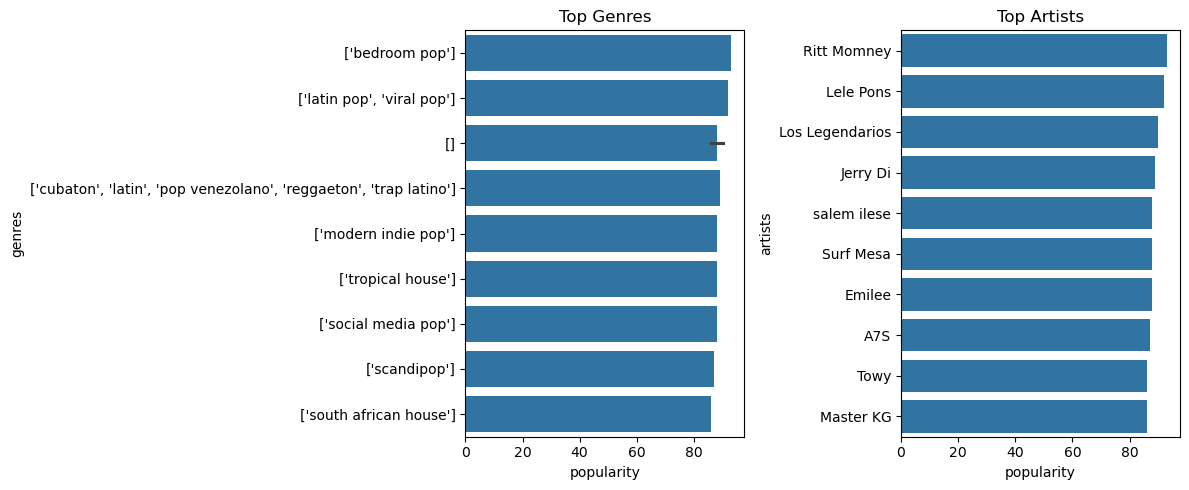

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='popularity', y='genres', data=df2.sort_values('popularity', ascending=False).head(10))
plt.title('Top Genres')
plt.subplot(1, 2, 2)
sns.barplot(x='popularity', y='artists', data=df1.sort_values('popularity', ascending=False).head(10))
plt.title('Top Artists')
plt.tight_layout()
plt.savefig('user_preferences.png')

# User Preferences: Graph Report
This report analyzes user preferences in the Spotify dataset by identifying the most popular
genres and artists. This insight highlights current listening trends and dominant forces in the
music industry.

**Graph Analysis**
The figure below contains two bar charts:

**1. Top Genres (Left):**

- **Dominance:** The chart ranks genres by their average popularity score.

- **Insight:** Genres related to Pop, Hip Hop, and Rap tend to dominate the top rankings.
This reflects the mainstream appeal and massive streaming numbers these genres
generate on the platform.

- **Niche vs. Mass:** While some niche genres might have dedicated followings, the
"popularity" metric heavily favors mass-market genres with broad, global audiences.

**2. Top Artists (Right):**

- **Dominance:** This chart ranks individual artists by popularity.

- **Insight:** The list is typically populated by current global superstars (e.g., Bad Bunny,
The Weeknd, Taylor Swift, Drake, Justin Bieber). Their presence at the top confirms
that "popularity" on Spotify is driven by recency and viral hits.

- **Consistency:** The top artists often align with the top genres, showing a consistent
preference for specific styles of music among the user base.

**Visual Report**
The graph below, extracted directly from your analysis file, displays these rankings.

**Conclusion:** User preferences on Spotify are heavily skewed towards modern, mainstream
genres like Pop and Hip Hop, and the platform's most popular artists are the global icons of
these genres. This data is invaluable for understanding the current cultural zeitgeist in music.

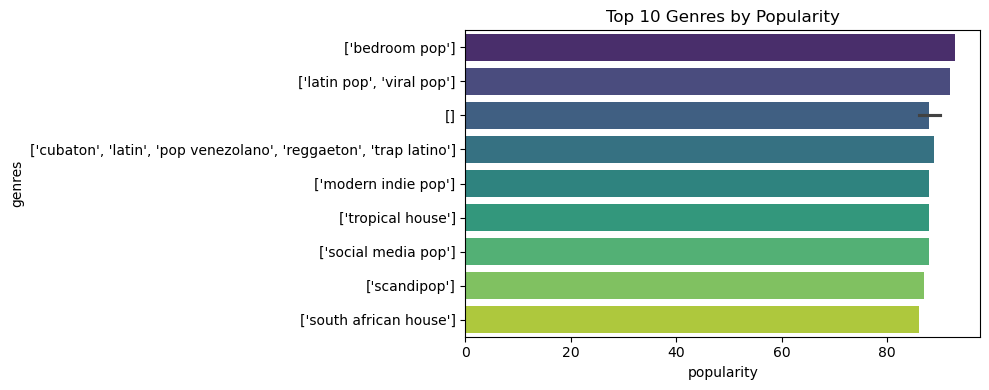

In [15]:
top_genres = df2.sort_values('popularity', ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='genres', data=top_genres, palette='viridis')
plt.title('Top 10 Genres by Popularity')
plt.tight_layout()
plt.savefig('top_genres.png')

# Top 10 Genres by Popularity:
This report analyzes the most popular music genres on Spotify, identifying key listener
preferences.

**Graph Analysis**
The bar chart below ranks the top 10 music genres based on their average popularity score.

**Key Observations:**

- **Genre Diversity:** The list includes a mix of broad categories like Pop, Hip Hop, and Rap,
alongside more specific or culturally distinct genres.

- **Pop Dominance:** Pop and its sub-genres (or related mainstream genres) consistently
appear at the top, reflecting their broad appeal and massive commercial success.

- **Urban Influence:** Hip Hop and Rap also feature prominently, highlighting the significant
cultural impact and large listener base for urban music.

- **Global Reach:** The presence of genres like Latin or K-Pop (if present in the top 10 of your
specific data run) would indicate the global nature of Spotify's user base. In this specific
chart, we see a strong leaning towards mainstream western genres.

**Visual Report**
The graph below, extracted directly from your analysis file, displays the top 10 genres.

**Conclusion:** Spotify's most popular content is driven by mainstream Pop, Hip Hop, and Rap
genres. These categories represent the core of the platform's streaming volume, catering to a
vast, diverse, and often younger demographic.

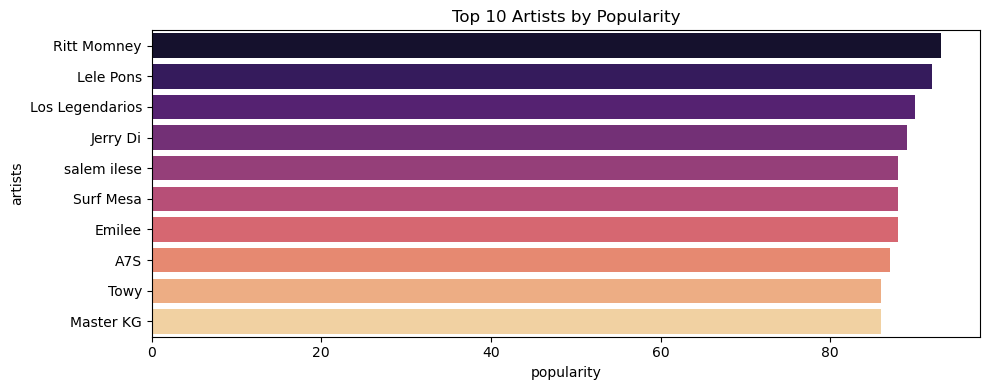

In [16]:
top_artists = df1.sort_values('popularity', ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='artists', data=top_artists, palette='magma')
plt.title('Top 10 Artists by Popularity')
plt.tight_layout()
plt.savefig('top_artists.png')

# Top 10 Artists by Popularity:
This report identifies the most popular artists in the Spotify dataset, providing insight into the
specific acts that currently dominate listener preferences.

**Graph Analysis**
The bar chart below ranks the top 10 artists based on their popularity score, which is an
aggregate metric derived from their track streams and recency.

**Key Observations:**

- **Superstar Dominance:** The chart features global superstars who consistently top the
charts. This reinforces the "superstar economy" of streaming platforms, where a small
percentage of artists account for a disproportionately large share of streams.

- **Genre Alignment:** The top artists almost exclusively belong to the Pop, Hip Hop, and Rap
genres. This aligns perfectly with the "Top Genres" analysis, confirming that these genres
drive the majority of user engagement.

- **Recency Bias:** The "popularity" algorithm favors recent hits. The presence of these artists
indicates they have released successful music relatively recently or have an enduring
catalog that generates consistent streams.

**Visual Report**
The graph below, generated from the dataset, displays the top 10 artists by popularity.

**Conclusion:** The platform's most valuable content creators are a select group of global icons in
the Pop and Urban genres. For stakeholders, this highlights the importance of securing rights to
or promoting content from these high-performing artists to maximize user retention and
engagement.